<a href="https://colab.research.google.com/github/johngodday/Plate-Number-Classification/blob/master/stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install -q xlrd
#!git clone https://github.com/johngodday/Plate-Number-Classification.git

Cloning into 'Plate-Number-Classification'...
remote: Enumerating objects: 316, done.
remote: Total 316 (delta 0), reused 0 (delta 0), pack-reused 316
Receiving objects: 100% (316/316), 42.55 MiB | 46.11 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
# Files from the cloned git repository.
#!ls Plate-Number-Classification

LICENSE  negative_images  plate_number	README.md


In [0]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


X.shape is (12288, 200)
Proceed 0 of 200


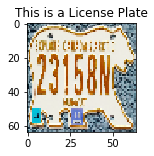

In [21]:
import glob
import pylab as plt
PLATE_NO_DIR = '/content/drive/My Drive/plate_number/'
NEG_IMG_DIR = '/content/drive/My Drive/negative_images/'


ROWS = 64
COLS = 64
CHANNELS = 3

plate_no_images = [PLATE_NO_DIR + i for i in os.listdir(PLATE_NO_DIR)]
neg_img = [NEG_IMG_DIR + i for i in os.listdir(NEG_IMG_DIR)]


def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images):
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower() :
      y[0,i] = 1
    elif 'image' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

X_img, y_img = prep_data(plate_no_images + neg_img)

classes = {0: 'Normal Image',
           1: 'License Plate'}

def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()
  
show_images(X_img.T, y_img.T, 0)

Model accuracy: 100.00%


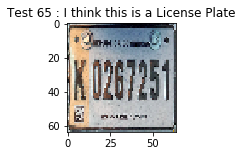

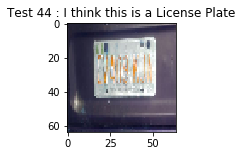

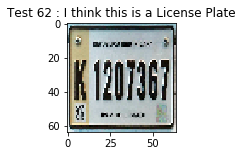

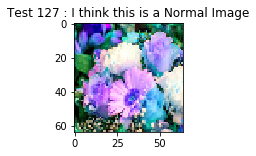

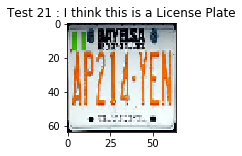

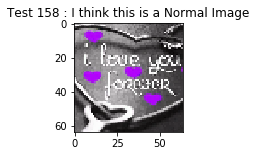

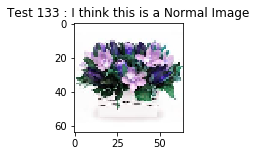

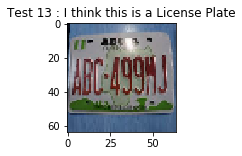

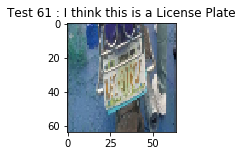

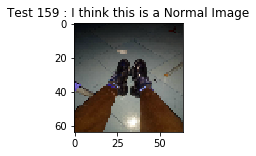

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

X_img_lr, y_img_lr = X_img.T, y_img.T.ravel()

clf.fit(X_img_lr,y_img_lr)

print("Model accuracy: {:.2f}%".format(clf.score(X_img_lr, y_img_lr)*100))

def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is a {}".format(idx, image_class))
  plt.show()
  
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 10) :
  show_image_prediction(X_img_lr, i, clf)